In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
# load the dataset
df = pd.read_csv("../data/raw/bank_churn.csv")

# view the data
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



### Data

| **Column** | **Description** | **Impact on Churn** |
| --- | --- | --- |
| **RowNumber** | Sequential number of the record. Used only for indexing. | None |
| **CustomerId** | Unique identifier for the customer. Random and non-influential. | None |
| **Surname** | Customer’s last name. No logical correlation with churn. | None |
| **CreditScore** | Customer’s credit rating (numeric). Lower scores may signal higher risk of leaving. | High |
| **Geography** | Customer’s country or region. Cultural, economic, or service factors in different locations may influence churn rates. | Moderate |
| **Gender** | Customer’s gender. May show slight behavioral trends but rarely a strong predictor. | Low |
| **Age** | Customer’s age. Younger customers typically change banks more often than older ones. | High |
| **Tenure** | Number of years the customer has been with the bank. Longer tenure often implies loyalty. | Moderate |
| **Balance** | Account balance. Higher balances correlate with lower churn likelihood. | High |
| **NumOfProducts** | Number of bank products owned (savings, credit card, loan, etc.). More products usually mean stronger engagement. | High |
| **HasCrCard** | Indicates whether the customer has a credit card (1 = yes, 0 = no). Credit card holders are slightly more likely to stay. | Low to Moderate |
| **IsActiveMember** | Indicates how active the customer is with the bank (1 = active, 0 = inactive). Inactive members are more likely to leave. | High |
| **EstimatedSalary** | Annual estimated salary. Lower incomes may correlate with higher churn. | Moderate |
| **Exited** | Target variable indicating if the customer left the bank (1 = Yes, 0 = No). | Target label |

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
# Check for missing values 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Drop duplicates
df = df.drop_duplicates()

In [6]:
# Drop the 'Surname' column 
df.drop(columns=['Surname','RowNumber',	'CustomerId'], inplace=True)

In [7]:
# Renaming target column for clarity
df.rename(columns={'Exited': 'Churn'}, inplace=True)

### The overall distribution of customers who have exited vs. those who stayed (churn rate).

C:\Users\FORAM\AppData\Local\Temp\ipykernel_21576\1513854517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='rocket')


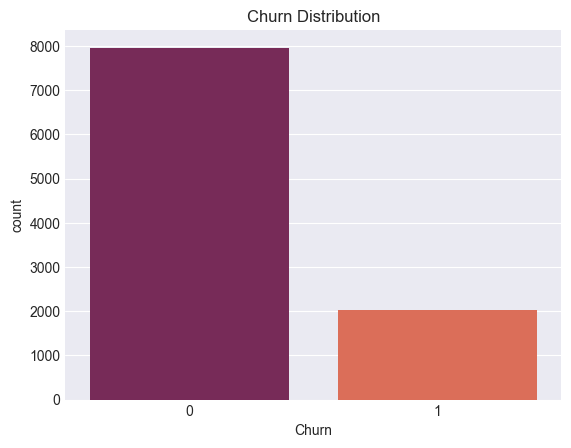

Churn count: Churn
0    7963
1    2037
Name: count, dtype: int64
Churn rate: Churn
0    79.63
1    20.37
Name: proportion, dtype: float64


In [8]:
#Churn distribution
sns.countplot(x='Churn', data=df, palette='rocket')
plt.title('Churn Distribution') 
plt.show()

churn_counts = df['Churn'].value_counts()
churn_rates = df['Churn'].value_counts(normalize=True) * 100

print(f'Churn count: {churn_counts}')
print(f'Churn rate: {churn_rates}')

### Relation between Age and Balance

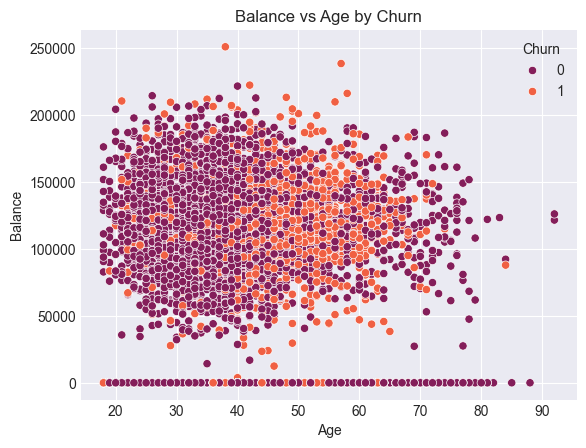

In [9]:
# Age vs. Balance
sns.scatterplot(x='Age', y='Balance', hue='Churn', data=df, palette='rocket')
plt.title("Balance vs Age by Churn")
plt.show()

### Observation
- According to this visualization, Age and Balance do not seem to be significant, standalone indicators of customer churn. 
- The pattern of customers who have churned (represented in orange) closely resembles that of customers who have not churned (shown in maroon) within the context of these two characteristics. 
- Other variables, which are not depicted here (such as credit score, number of products, or estimated salary), are likely to have a greater impact on churn.

In [10]:
df_encoded = df.copy()

# Encoding categorical variables
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 1, 'Female': 0})
df_encoded = pd.get_dummies(df_encoded, columns=['Geography'], drop_first=True)


In [11]:
df_encoded = df_encoded.drop(columns=['Surname'], errors='ignore')
df_encoded = df_encoded.drop(columns=['CustomerId', 'RowNumber'], errors='ignore')

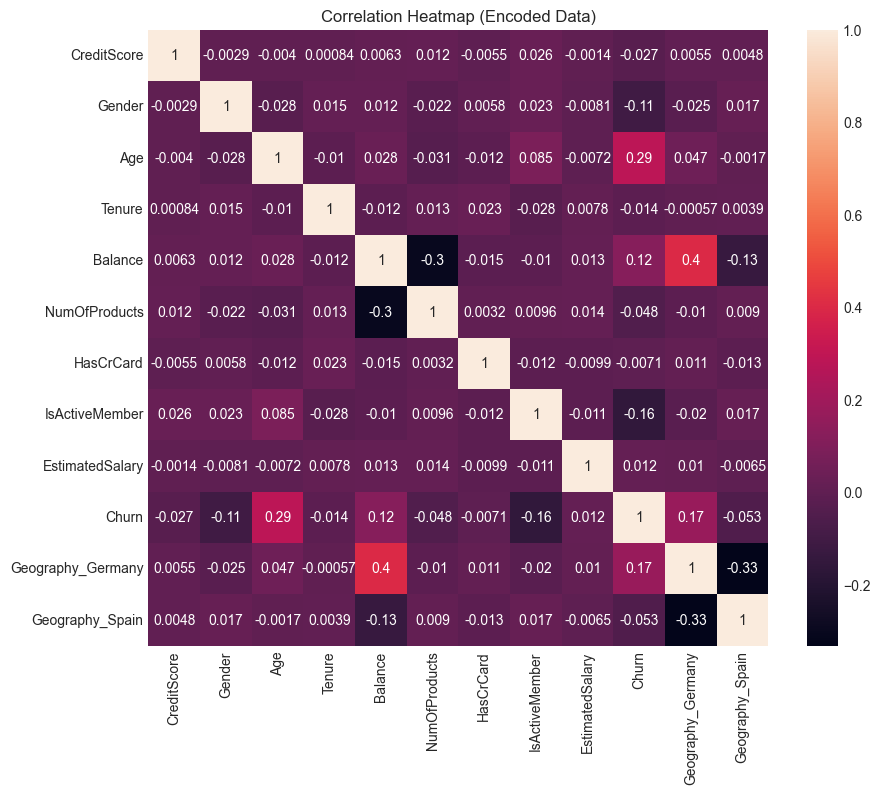

In [12]:
# Now only numeric columns remain
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='rocket')
plt.title("Correlation Heatmap (Encoded Data)")
plt.show()

#### Observation
- Here gender shows a weak correlation with churn (around -0.11).

- Age, Balance, and IsActiveMember have stronger correlations with churn.

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

#### The effect of geography on customer churn. 

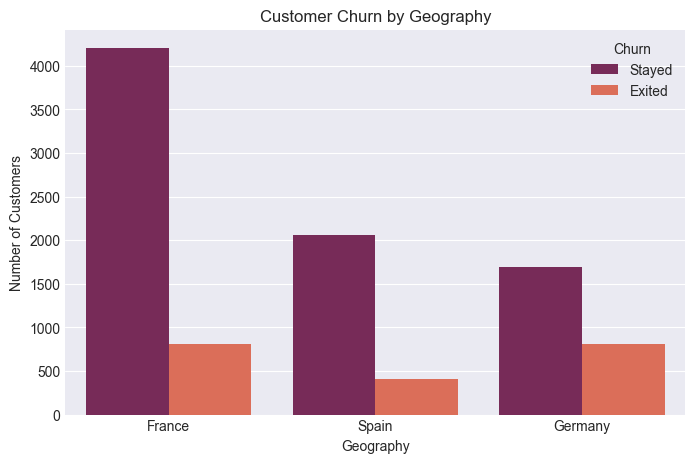

Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Churn, dtype: float64

In [14]:
# Plotting churn by geography
plt.figure(figsize=(8,5))
sns.countplot(x='Geography', hue='Churn', data=df, palette='rocket')
plt.title('Customer Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Stayed', 'Exited'])
plt.show()

# Calculate churn rate per geography
churn_by_geography = df.groupby('Geography')['Churn'].mean() * 100
churn_by_geography

### Observation 

- Only based on the geography, customer from Germany are more likely to exit.

### The role of gender in customer churn

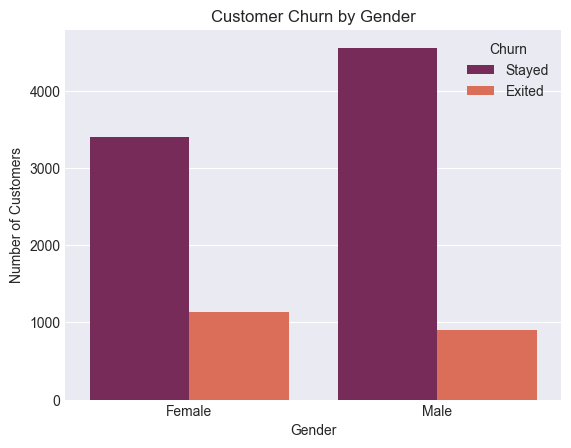

Gender
Female    25.071539
Male      16.455928
Name: Churn, dtype: float64

In [15]:
sns.countplot(x='Gender', hue='Churn', data=df, palette='rocket')
plt.title('Customer Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Stayed', 'Exited'])
plt.show()   
churn_by_gender = df.groupby('Gender')['Churn'].mean() * 100
churn_by_gender

### Age

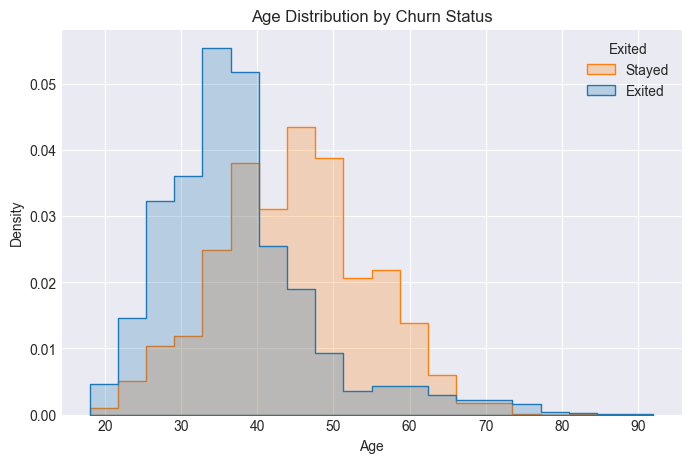

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Churn', bins=20, element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Exited', labels=['Stayed', 'Exited'])
plt.show()

### Observation
- Churn likelihood decreases with age.

- The majority of customers who stay are in their mid-40s and older, while customers who leave tend to be younger.

In [17]:
df_encoded.to_csv("../data/processed/bank_churn_clean.csv", index=False)